In [1]:
import numpy as np
from matplotlib import pyplot as plt

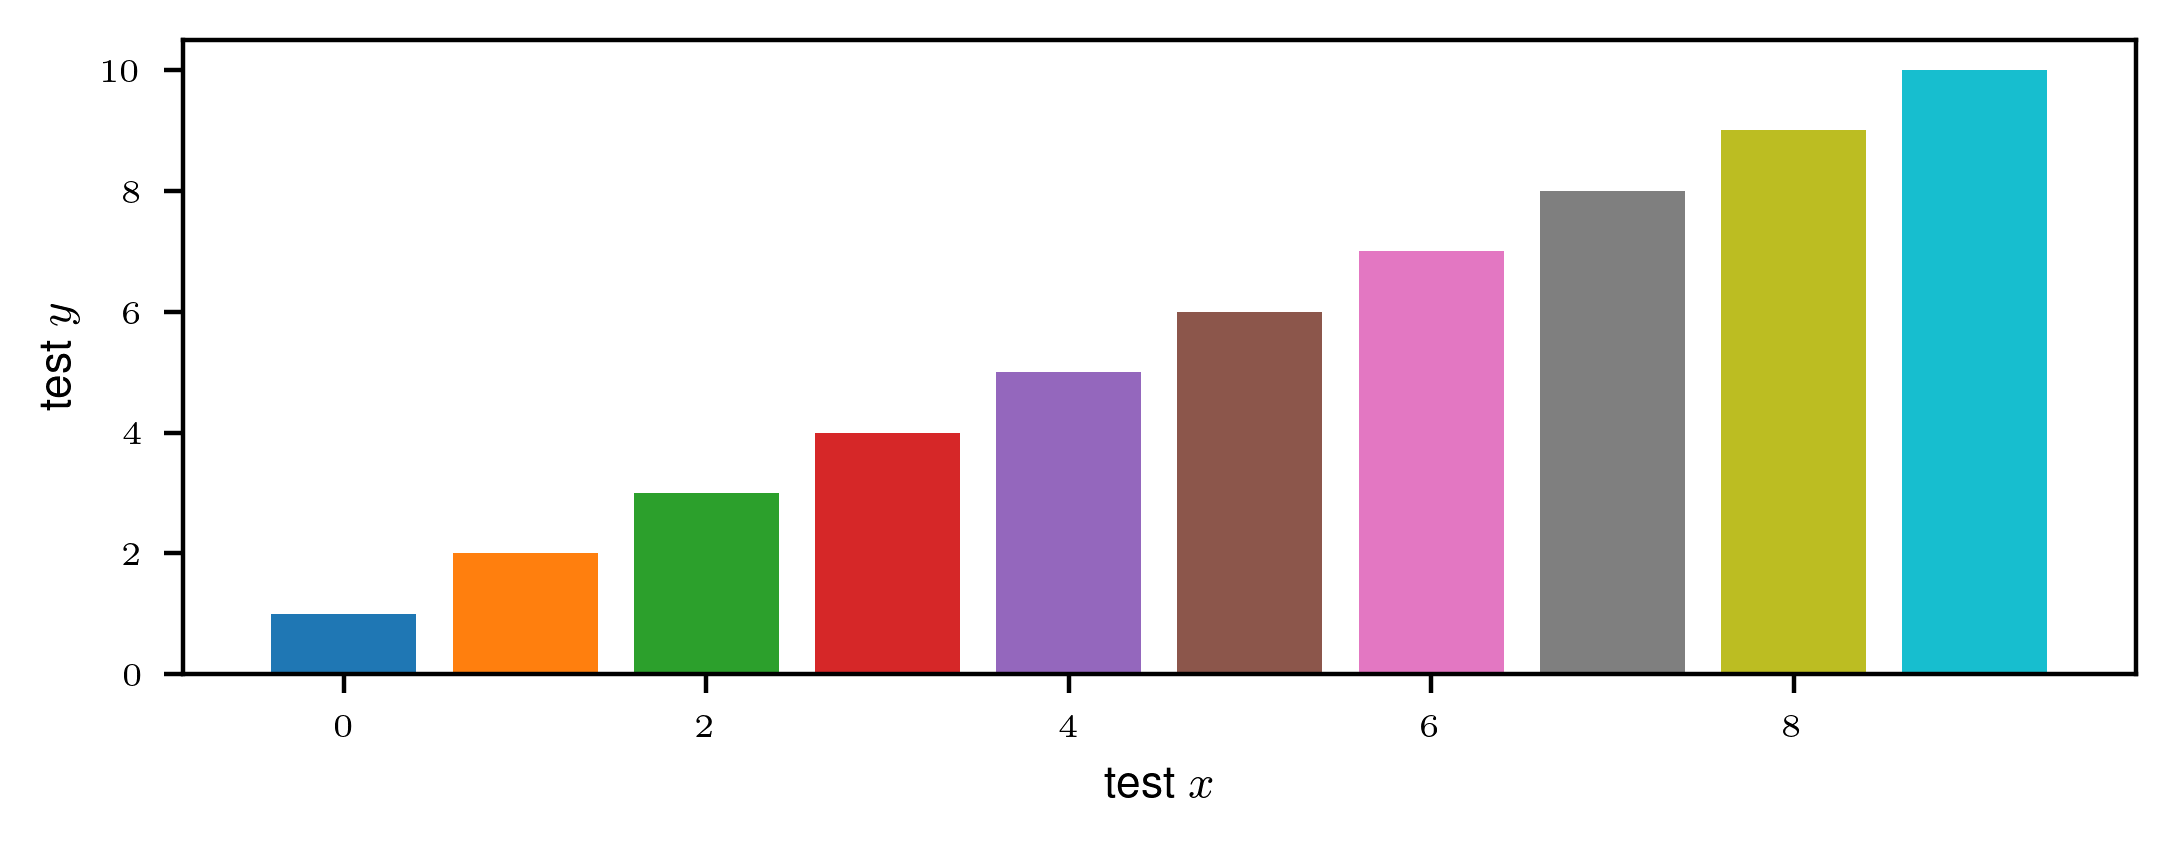

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
import matplotlib.lines as mlines

text_width = 6.30107 # in  --> Confirmed with template explanation

fs_m1 = 6  # for figure ticks
fs = 8  # for regular figure text
fs_p1 = 9  # figure titles

matplotlib.rc('font', size=fs)          # controls default text sizes
matplotlib.rc('axes', titlesize=fs)     # fontsize of the axes title
matplotlib.rc('axes', labelsize=fs)    # fontsize of the x and y labels
matplotlib.rc('xtick', labelsize=fs_m1)    # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=fs_m1)    # fontsize of the tick labels
matplotlib.rc('legend', fontsize=fs_m1)    # legend fontsize
matplotlib.rc('figure', titlesize=fs_p1)  # fontsize of the figure title


matplotlib.rc('font', **{'family':'sans-serif', 'sans-serif': ['Helvetica']})
matplotlib.rc('text', usetex=True)

plt.figure(dpi=400, figsize=(text_width, text_width/3))
for i in range(10):
       plt.bar(i, i + 1, color=f'C{i}', zorder=2)
       # ^ This zorder nonsense makes the grid  lines go behid the bars. I don't know why this is needed for barplots, but shouldn't usually be needed.
# plt.title('\\textbf{Test}, $\\mathcal{C}, \\mathbb{R}$')
plt.xlabel('test $x$')
plt.ylabel('test $y$')
plt.show()

In [16]:
#compute prep amount fot the different networks
small_rad = "0.5"
big_rad = "2.0"
skew_dir = f"/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/linear_lambda_0.000001/ramping_skew/seed_3_4.0_mixed"
def soc_dir(seed=0):
    return f"/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/linear_lambda_0.000001/ramping_soc/seed_{seed}_mixed"
skew_dir_prep = f"/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/linear_lambda_0.000001/ramping_skew/seed_3_4.0_prep"
def soc_dir_prep(seed=0):
    return f"/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/linear_lambda_0.000001/ramping_soc/seed_{seed}_prep"
skew_dir_mov = f"/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/linear_lambda_0.000001/ramping_skew/seed_3_4.0_mov"
def soc_dir_mov(seed=0):
    return f"/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/linear_lambda_0.000001/ramping_soc/seed_{seed}_mov"

def get_rates(dir, i = 0, t= 300):
    return np.loadtxt(f"{dir}/rates_{i}_{t}")

def get_us(dir, i = 0, t= 300):
    return np.loadtxt(f"{dir}/us_{i}_{t}")

def get_hands(dir, i = 0, t= 300):
    h = np.loadtxt(f"{dir}/hands_{i}_{t}")
    return h - h[0,:][None,:]

def get_torques(dir, i = 0, t= 300):
    return np.loadtxt(f"{dir}/torques_{i}_{t}")

def rates_skew(i=0,t=300):
    return get_rates(skew_dir, i, t)

def rates_soc(i=0,t=300):
    return np.loadtxt(f"{soc_dir()}/rates_{i}_{t}")

def rates_skew_mov(i=0,t=300):
    return np.loadtxt(f"{skew_dir_mov}/rates_{i}_{t}")

def rates_soc_mov(i=0,t=300):
    return np.loadtxt(f"{soc_dir_mov()}/rates_{i}_{t}")

def rates_skew_prep(i=0,t=300):
    return np.loadtxt(f"{skew_dir_prep}/rates_{i}_{t}")

def rates_soc_prep(i=0,t=300):
    return np.loadtxt(f"{soc_dir_prep()}/rates_{i}_{t}")

def us_skew(i=0,t=300):
    return np.loadtxt(f"{skew_dir}/us_{i}_{t}")

def us_soc(i=0,t=300):
    return np.loadtxt(f"{soc_dir()}/us_{i}_{t}")

def us_skew_mov(i=0,t=300):
    return np.loadtxt(f"{skew_dir_mov}/us_{i}_{t}")

def us_soc_mov(i=0,t=300):
    return np.loadtxt(f"{soc_dir_mov()}/us_{i}_{t}")

def us_skew_prep(i=0,t=300):
    return np.loadtxt(f"{skew_dir_prep}/us_{i}_{t}")

def us_soc_prep(i=0,t=300):
    return np.loadtxt(f"{soc_dir_prep()}/us_{i}_{t}")

targets = np.loadtxt(f"/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/random_monkeys_random_lambda_2E-6/ramping_skew/seed_3_200_2_1._0.025/targets")
soc_eigs = np.loadtxt(f"/rds/user/mmcs3/hpc-work/_results/why_prep/data/w_rec_4_eig")
skew_eigs = np.loadtxt(f"{skew_dir}/eigs")
rdn_eigs = np.loadtxt(f"/rds/user/mmcs3/hpc-work/_results/why_prep/data/w_rec_4_eig")


In [17]:
n_targets = 6
times = [0, 50, 100, 300]
def prep_idx(dir):
    def get_prep_idx(us, t):
        if t == 0:
            return 0
        else : 
            cutoff = int(t/2 )
            u_prep, u_mov = us[:cutoff], us[cutoff:]
            return np.sum(u_prep**2)/np.sum(u_mov**2)
    def us(t,i):
        return np.loadtxt(f"{dir}/us_{i}_{t}")
    def get_all_idces(i):
        ai = np.asarray([get_prep_idx(us(t, i),t) for t in times])
        return ai
    movs = range(n_targets)
    idces = np.concatenate([get_all_idces(i)[:,None] for i in movs], axis=1)
    m, v = np.mean(idces, axis=1), np.std(idces, axis=1)/np.sqrt(8)
    return m, v

def cost_u(dir):
    def cost_u(t, i):
       return np.loadtxt(f'{dir}/u_cost_{i}_{t}')[-1]
    def get_all_idces(i):
        ai = np.asarray([cost_u(t,i) for t in times])
        return ai
    movs = range(n_targets)
    idces = np.concatenate([get_all_idces(i)[:,None] for i in movs], axis=1)
    m, v = np.mean(idces, axis=1), np.std(idces, axis=1)/np.sqrt(8)
    return m, v

def cost_tgt(dir):
    def cost_tgt(t, i):
       return np.loadtxt(f'{dir}/task_cost_{i}_{t}')[-1]
    def get_all_idces(i):
        ai = np.asarray([cost_tgt(t,i) for t in times])
        return ai
    movs = range(n_targets)
    idces = np.concatenate([get_all_idces(i)[:,None] for i in movs], axis=1)
    m, v = np.mean(idces, axis=1), np.std(idces, axis=1)/np.sqrt(n_targets)
    return m, v

def cost_torques(dir):
    def cost_torques(t, i):
       return np.loadtxt(f'{dir}/task_cost_{i}_{t}')[0]
    def get_all_idces(i):
        ai = np.asarray([cost_torques(t,i) for t in times])
        return ai
    movs = range(n_targets)
    idces = np.concatenate([get_all_idces(i)[:,None] for i in movs], axis=1)
    m, v = np.mean(idces, axis=1), np.std(idces, axis=1)/np.sqrt(n_targets)
    return m, v

def mv_loss(dir):
    def cost_torques(t, i):
       return np.loadtxt(f'{dir}/loss_{i}_{t}').sum()
    def get_all_idces(i):
        ai = np.asarray([cost_torques(t,i) for t in times])
        return ai
    movs = range(n_targets)
    idces = np.concatenate([get_all_idces(i)[:,None] for i in movs], axis=1)
    m, v = np.mean(idces, axis=1), np.std(idces, axis=1)/np.sqrt(n_targets)
    return m, v

In [18]:
m_prep_skew, _ = prep_idx(skew_dir)
m_prep_soc, _ = prep_idx(soc_dir())
m_prep_skew_mov, _ = prep_idx(skew_dir_mov)
m_prep_soc_mov, _ = prep_idx(soc_dir_mov())
m_loss_skew, _ =  mv_loss(skew_dir)
m_loss_soc, _ =  mv_loss(soc_dir())
m_loss_skew_prep, _ = mv_loss(skew_dir_prep)
m_loss_soc_prep, _ = mv_loss(soc_dir_prep())
m_loss_skew_mov, _ = mv_loss(skew_dir_mov)
m_loss_soc_mov, _ = mv_loss(soc_dir_mov())

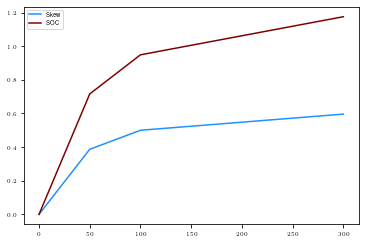

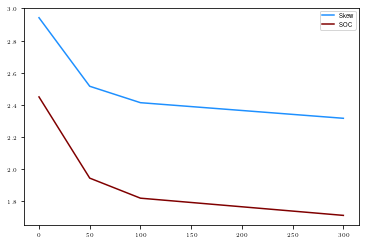

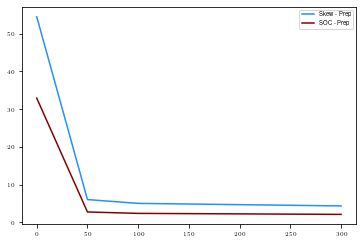

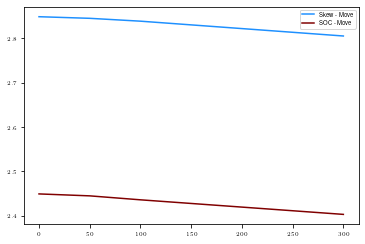

In [19]:
c_nets = {"rdn":"orange", "skew":"dodgerblue", "soc":"maroon", "lr":"forestgreen", "disc":"black"}
plt.plot(times, m_prep_skew,  c_nets["skew"], label="Skew")
plt.plot(times, m_prep_soc,  c_nets["soc"], label="SOC")
# plt.plot(m_prep_tanh)
# plt.plot(times, m_prep_lr,  c_nets["lr"], label="Low-rank")
plt.legend()

plt.figure()
plt.plot(times, m_loss_skew,   c_nets["skew"], label="Skew")
plt.plot(times, m_loss_soc,   c_nets["soc"], label="SOC")
plt.legend()
plt.figure()
plt.plot(times, m_loss_skew_prep,  c_nets["skew"], label="Skew - Prep")
plt.plot(times, m_loss_soc_prep,  c_nets["soc"], label="SOC - Prep")
plt.legend()
plt.figure()
plt.plot(times, m_loss_skew_mov,  c_nets["skew"], label="Skew - Move")
plt.plot(times, m_loss_soc_mov,  c_nets["soc"], label="SOC - Move")
plt.legend()

In [20]:
#ax00 = fig.add_axes([0.15, 0.8, 0.05, 0.08])
# ax00.plot(targets[:,0], targets[:,1],'ok', markersize=0.4)
# ax00.plot(thetas_rdn()[:,0],thetas_rdn()[:,1],'r', linewidth=0.5)
# ax00.set_xticks([])
# ax00.set_yticks([])
# axes[0, 0].plot(np.sqrt(thetas_rdn()[:,2]**2+thetas_rdn()[:,3]**2), 'k')
# axes[0,0].set_xticks([])
# axes[1, 0].plot(rates_rdn()[:,:10])
# axes[1,0].set_xticks([])
# axes[2, 0].plot(us_rdn()[:,:10])

1894089.5733124914
2703877.2435589647
2737060.8107569083
1896870.5999052308


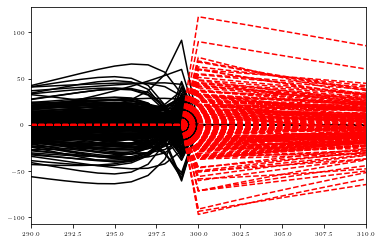

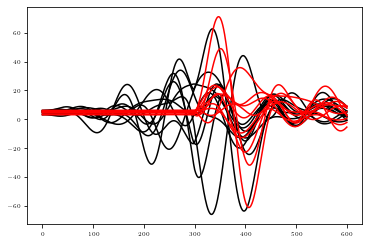

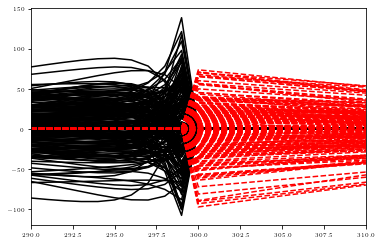

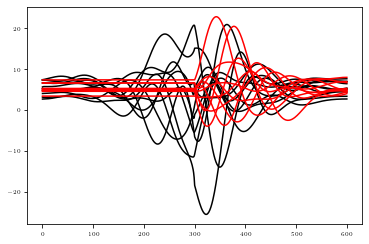

In [21]:
print(np.linalg.norm(us_soc_prep(4,600))**2)
print(np.linalg.norm(us_soc_mov(4,600))**2)
print(1000*np.linalg.norm(us_soc_mov(4,600)[:300,:])**2 + np.linalg.norm(us_soc_mov(4,600)[300:,:])**2)
print(np.linalg.norm(us_soc_prep(4,600)[:300,:])**2 + 1000*np.linalg.norm(us_soc_prep(4,600)[300:,:])**2)

plt.plot(us_soc_prep(4,600)[:,:], 'k')
plt.plot(us_soc_mov(4,600)[:,:], '--r')
plt.xlim(290,310)
plt.figure()
plt.plot(rates_soc_prep(4,600)[:,:10], 'k')
plt.plot(rates_soc_mov(4,600)[:,:10], 'r')
##Skew
plt.figure()
plt.plot(us_skew_prep(4,600)[:,:], 'k')
plt.plot(us_skew_mov(4,600)[:,:], '--r')
plt.xlim(290,310)
plt.figure()
plt.plot(rates_skew_prep(4,600)[:,:10], 'k')
plt.plot(rates_skew_mov(4,600)[:,:10], 'r')


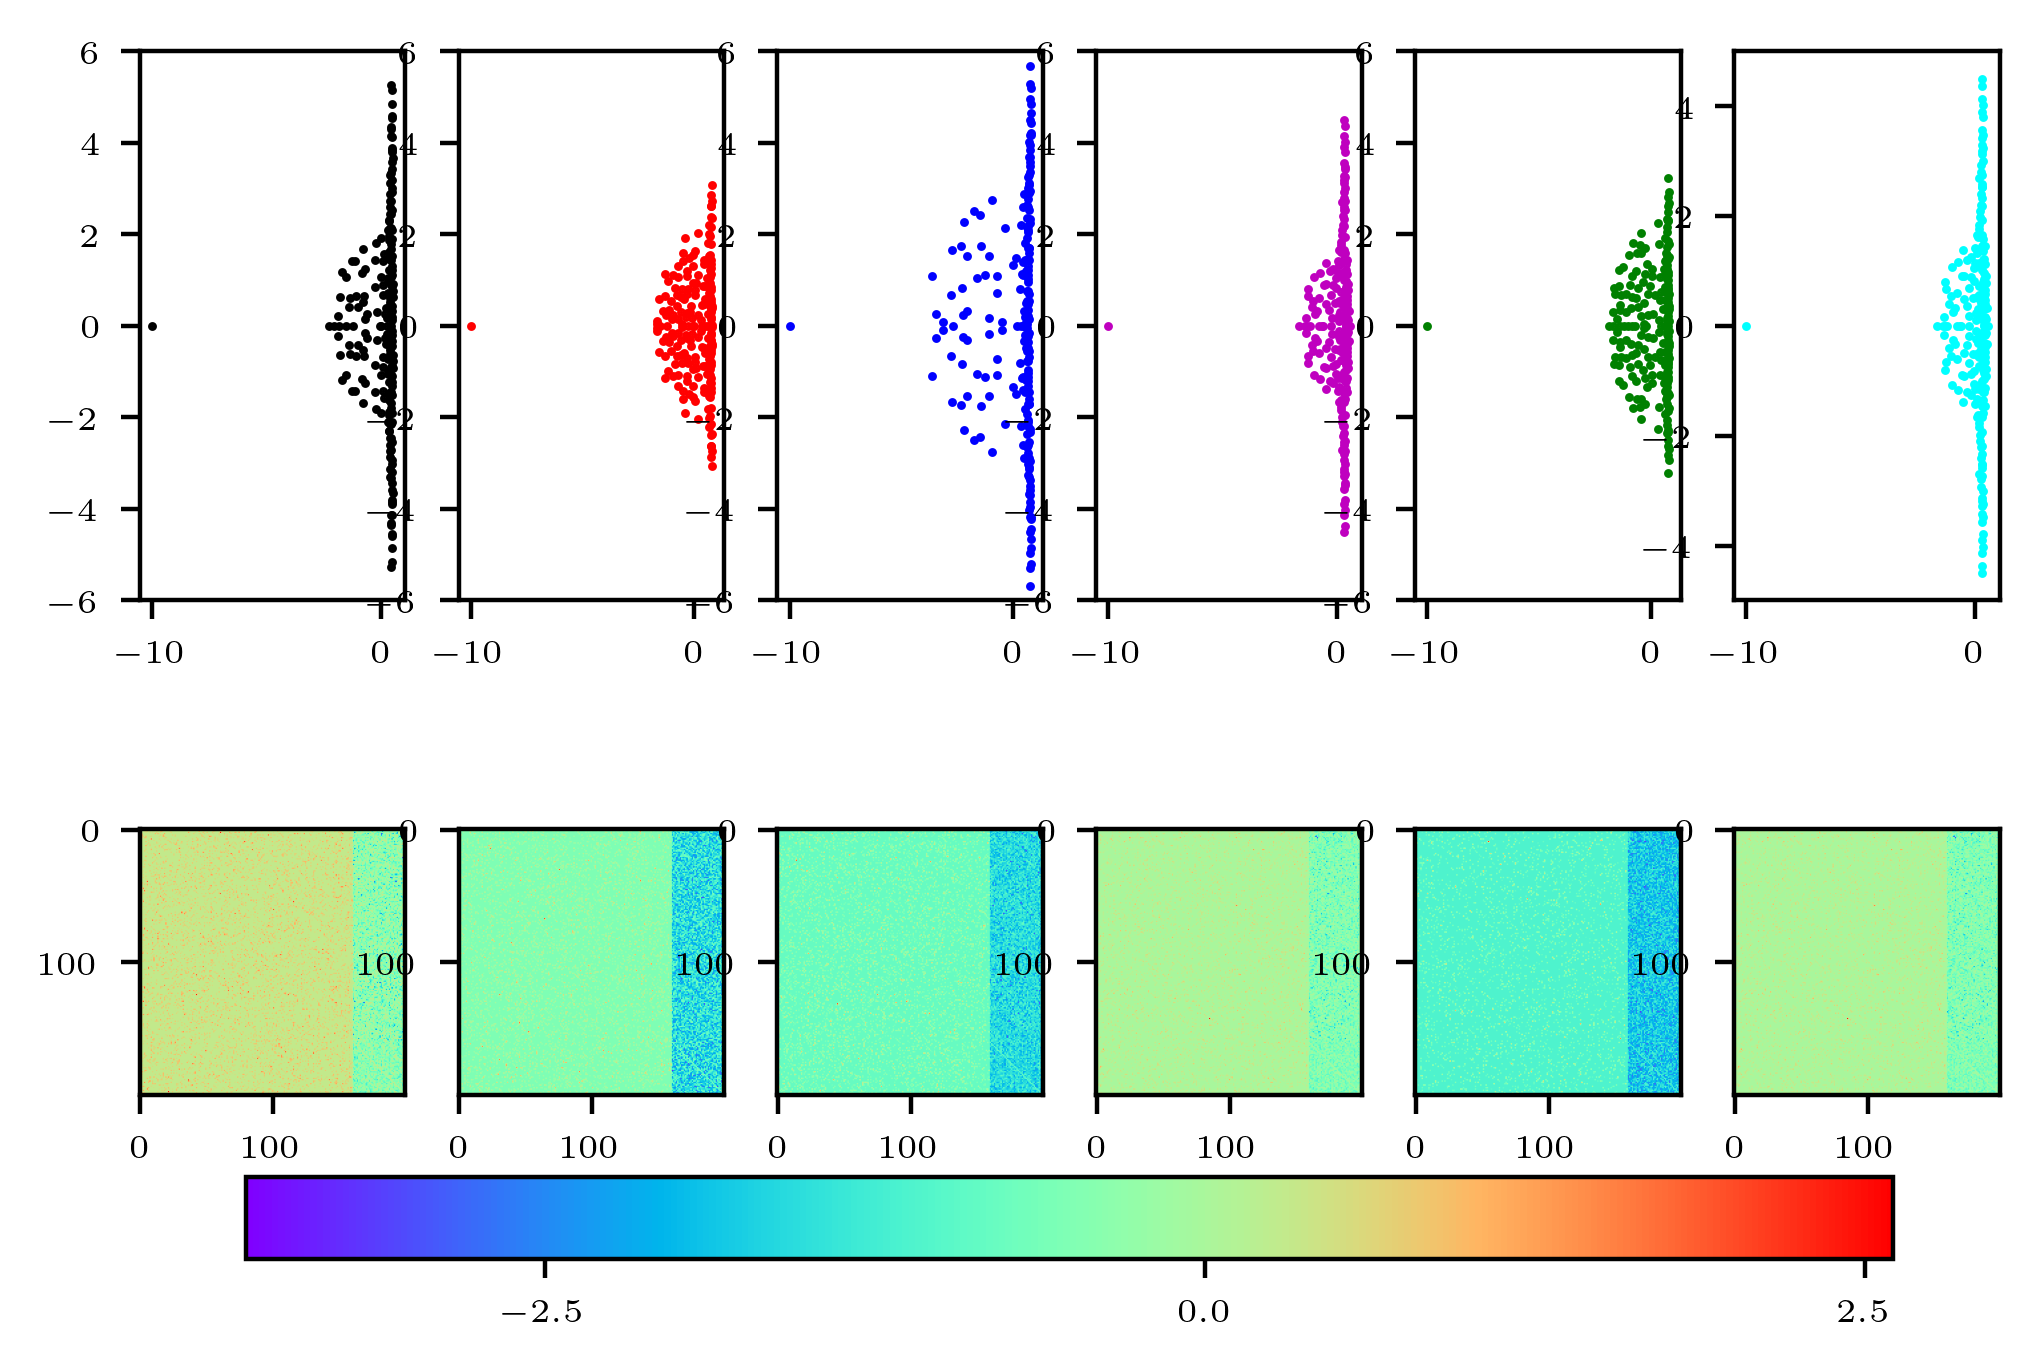

In [22]:
def w_eigs(seed):
    return np.loadtxt(f"/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/linear_lambda_0.000001/ramping_soc/seed_{seed}_mixed/eigs")
def w(seed):
    return np.loadtxt(f"/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/linear_lambda_0.000001/w_rec_{seed}")
def w_rad(rad,sa,p=0.2):
    return np.loadtxt(f"/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/linear_lambda_0.000001/w_rec_{rad}_{sa}_{p}")
def w_rad_eigs(rad,sa,p=0.2):
    return np.loadtxt(f"/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/linear_lambda_0.000001/w_rec_{rad}_{sa}_{p}_eig")
fig,axes=plt.subplots(2,6,dpi=400)
axes[0,0].set_ylim(-6,6)
axes[0,0].plot(w_eigs(0)[:,0], w_eigs(0)[:,1],'ok',markersize=0.6)
axes[0,1].set_ylim(-6,6)
axes[0,1].plot(w_eigs(1)[:,0], w_eigs(1)[:,1],'or',markersize=0.6)
axes[0,2].set_ylim(-6,6)
axes[0,2].plot(w_rad_eigs(3.0,0.8)[:,0], w_rad_eigs(3.0,0.8)[:,1],'ob',markersize=0.6)
axes[0,3].set_ylim(-6,6)
axes[0,3].plot(w_rad_eigs(1.5,0.6)[:,0], w_rad_eigs(1.5,0.6)[:,1],'om',markersize=0.6)
axes[0,4].set_ylim(-6,6)
axes[0,4].plot(w_rad_eigs(1.5,0.8,0.1)[:,0], w_rad_eigs(1.5,0.8,0.1)[:,1],'og',markersize=0.6)
axes[0,5].set_ylim(-5,5)
axes[0,5].plot(w_rad_eigs(1.5,0.6,0.2)[:,0], w_rad_eigs(1.5,0.6,0.2)[:,1],'o', color="cyan",markersize=0.6)
p = axes[1,0].imshow(w(0),cmap="rainbow")
#fig.clim(-3,3)
p = axes[1,1].imshow(w(1),cmap="rainbow")
p = axes[1,2].imshow(w_rad(3.0,0.8),cmap="rainbow")
p = axes[1,3].imshow(w_rad(1.5,0.6),cmap="rainbow")
p = axes[1,4].imshow(w_rad(1.5,0.8,0.1),cmap="rainbow")
p = axes[1,5].imshow(w_rad(1.5,0.6,0.2),cmap="rainbow")
fig.colorbar(p, ax = axes[1,:],orientation="horizontal",ticks=[-2.5,0,2.5])



In [23]:
w0 = w(0)
print(1-(w0[:160,:160] == 0).sum()/160/160)
print(1- (w0[160:,160:] == 0).sum()/40/40)
w1 = w(1)
print(1-(w1[:160,:160] == 0).sum()/160/160)
print(1-(w1[160:,160:] == 0).sum()/40/40)
w2 = w_rad(1.5,0.8,0.1)
print(1-(w2[:160,:160] == 0).sum()/160/160)
print(1-(w2[160:,160:] == 0).sum()/40/40)

0.19999999999999996
0.96625
0.19999999999999996
0.974375
0.09999999999999998
0.970625


## Comparison of the behaviour

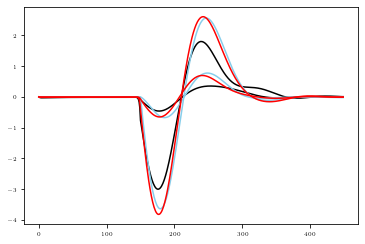

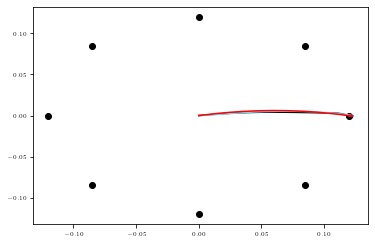

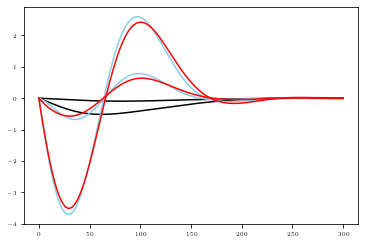

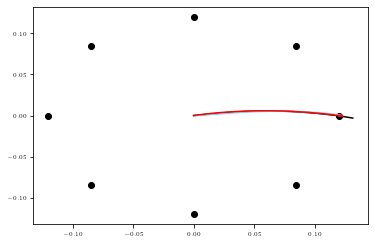

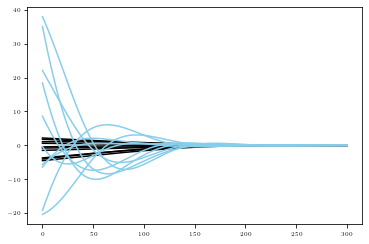

In [24]:
#checking what happens at a radius of 20?
hand_targets = np.loadtxt(f"/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/random_monkeys_random_lambda_1E-7/mov_only_soc/hand_targets")
plt.plot(get_torques(skew_dir_prep),"k")
plt.plot(get_torques(skew_dir_mov),"skyblue")
plt.plot(get_torques(skew_dir), "r")
plt.figure()
plt.plot(hand_targets[:,0], hand_targets[:,1],'ok')
plt.plot(get_hands(skew_dir_prep)[:,0],get_hands(skew_dir_prep)[:,2],"k")
plt.plot(get_hands(skew_dir_mov)[:,0],get_hands(skew_dir_mov)[:,2],"skyblue")
plt.plot(get_hands(skew_dir)[:,0],get_hands(skew_dir)[:,2], "r")
plt.figure()
plt.plot(get_torques(skew_dir_prep, t=0),"k")
plt.plot(get_torques(skew_dir_mov,t=0),"skyblue")
plt.plot(get_torques(skew_dir,t=0), "r")
plt.figure()
plt.plot(hand_targets[:,0], hand_targets[:,1],'ok')
plt.plot(get_hands(skew_dir_prep,t=0)[:,0],get_hands(skew_dir_prep,t=0)[:,2],"k")
plt.plot(get_hands(skew_dir_mov,t=0)[:,0],get_hands(skew_dir_mov,t=0)[:,2],"skyblue")
plt.plot(get_hands(skew_dir,t=0)[:,0],get_hands(skew_dir,t=0)[:,2], "r")
plt.figure()
plt.plot(get_us(skew_dir_prep,t=0)[:,:10],"k")
plt.plot(get_us(skew_dir_mov,t=0)[:,:10],"skyblue")

## Check losses

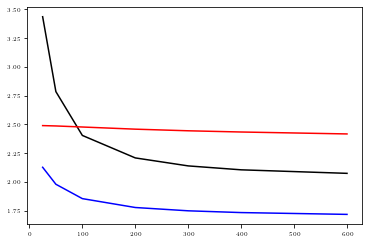

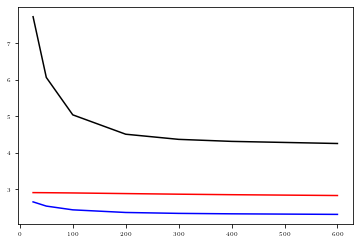

In [25]:
def get_loss(dir,i,t):
    return np.loadtxt(f"{dir}/loss_{i}_{t}")

ts = [25, 50, 100, 200, 300, 400, 600]
i_s = range(7)
def get_across(f):
    fs = [f(i) for i in i_s]
    return np.mean(np.asarray(fs))
losses_prep = [get_across(lambda i : get_loss(soc_dir_prep(0), i, t)) for t in ts]
losses_mov = [get_across(lambda i : get_loss(soc_dir_mov(0), i, t)) for t in ts]
losses = [get_across(lambda i : get_loss(soc_dir(0), i, t)) for t in ts]
plt.plot(ts, losses_prep, "k")
plt.plot(ts, losses_mov, "r")
plt.plot(ts, losses, "b")
### Skew
plt.figure()
losses_prep = [get_across(lambda i : get_loss(skew_dir_prep, i, t)) for t in ts]
losses_mov = [get_across(lambda i : get_loss(skew_dir_mov, i, t)) for t in ts]
losses = [get_across(lambda i : get_loss(skew_dir, i, t)) for t in ts]
plt.plot(ts, losses_prep, "k")
plt.plot(ts, losses_mov, "r")
plt.plot(ts, losses, "b")

## Check QUUs

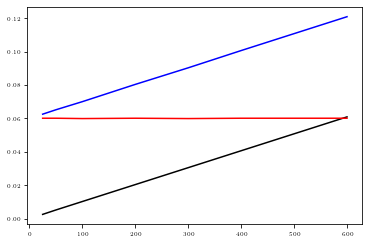

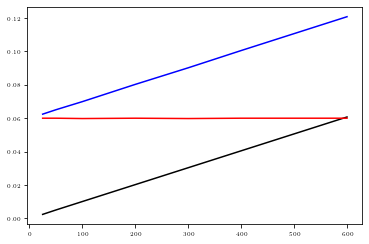

In [26]:

def get_quus(dir,i,t,typ):
    quus = np.loadtxt(f"{dir}/quus_{i}_{t}")
    if typ=="prep":
        quus = quus[:int(t/2)]
    elif typ=="mov":
        quus = quus[int(t/2):]
    return np.sum(quus)

quu_prep = [get_across(lambda i : get_quus(soc_dir_prep(1), i, t, "prep")) for t in ts]
quu_mov = [get_across(lambda i : get_quus(soc_dir_mov(1), i, t, "mov")) for t in ts]
quus = [get_across(lambda i : get_quus(soc_dir(1), i, t, "mixed")) for t in ts]
plt.plot(ts, quu_prep, "k")
plt.plot(ts, quu_mov, "r")
plt.plot(ts, quus, "b")
##Skew
plt.figure()
quu_prep = [get_across(lambda i : get_quus(skew_dir_prep, i, t, "prep")) for t in ts]
quu_mov = [get_across(lambda i : get_quus(skew_dir_mov, i, t, "mov")) for t in ts]
quus = [get_across(lambda i : get_quus(skew_dir, i, t, "mixed")) for t in ts]
plt.plot(ts, quu_prep, "k")
plt.plot(ts, quu_mov, "r")
plt.plot(ts, quus, "b")